# SAUTER UNIVERSITY - DATA SPECIALIST PROGRAM 2023

# DESAFIO TÉCNICO

# NOME: ROMÁRIO ABÍLIO DE FRANÇA

#  Tratamento dos dados

# Introdução ao Tratamento de Dados do Airbnb

Neste notebook,vou começar abordando o tratamento dos dados de listagens do Airbnb no Rio de Janeiro. O objetivo é limpar e preparar os dados para análise e modelagem preditiva. Isso inclui a remoção de colunas desnecessárias, tratamento de valores nulos, conversão de tipos de dados e remoção de outliers. Este processo é essencial para garantir a qualidade dos dados antes de prosseguir para a construção de modelos preditivos.


In [ ]:
import pandas as pd
import numpy as np
import sys

In [ ]:
df = pd.read_csv("listings.csv")

# Exploração Inicial dos Dados

Inicialmente, eu realizo uma exploração básica dos dados para entender sua estrutura. Isso inclui visualizar as primeiras e últimas linhas do conjunto de dados, além de algumas linhas aleatórias. Também verifico a quantidade de linhas e colunas para ter uma ideia do tamanho do conjunto de dados.


In [ ]:
# Primeiras 5 linhas do Dataset
display(df.head())

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,231497,https://www.airbnb.com/rooms/231497,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.73 · 1 bedr...,"This is a big studio at the end of Copacabana,...",NaN,https://a0.muscache.com/pictures/3582382/ee8ac...,1207700,...,4.92,4.90,4.65,NaN,f,4,4,0,0,0.54
1,231516,https://www.airbnb.com/rooms/231516,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...,"Special location of the building, on Copacaban...",NaN,https://a0.muscache.com/pictures/3671683/d74b4...,1207700,...,4.86,4.93,4.38,NaN,f,4,4,0,0,0.20
2,236991,https://www.airbnb.com/rooms/236991,20230922043705,2023-09-23,city scrape,Rental unit in Rio de Janeiro · ★4.89 · 1 bedr...,"Aconchegante, amplo, básico, arejado, iluminad...","Copacabana, apelidada a princesinha do mar, fa...",https://a0.muscache.com/pictures/5725a59b-147d...,1241662,...,4.96,4.99,4.89,NaN,f,2,2,0,0,0.65
3,17878,https://www.airbnb.com/rooms/17878,20230922043705,2023-09-23,city scrape,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.77,4.67,NaN,f,1,1,0,0,1.87
4,25026,https://www.airbnb.com/rooms/25026,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/a745aa21-b8dd...,102840,...,4.92,4.84,4.59,NaN,f,1,1,0,0,1.68


In [ ]:
# Últimas 5 linhas do Dataset
df.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
31959,985064291460771751,https://www.airbnb.com/rooms/985064291460771751,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★New · 1 bedro...,Relaxe com toda a família nesta acomodação tra...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,401842074,...,NaN,NaN,NaN,NaN,f,24,24,0,0,NaN
31960,985340991466900379,https://www.airbnb.com/rooms/985340991466900379,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★New · 2 bedro...,"Hello!<br /><br />Season apartment, exclusive,...",Copacabana is a 24/7 neighborhood and very cha...,https://a0.muscache.com/pictures/prohost-api/H...,30165706,...,NaN,NaN,NaN,NaN,t,67,64,3,0,NaN
31961,985507696630141934,https://www.airbnb.com/rooms/985507696630141934,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★New · 1 bedro...,O Apart-Hotel Villa Del Sol fica localizado na...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,416337225,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
31962,985510361579508644,https://www.airbnb.com/rooms/985510361579508644,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★New · 2 bedro...,"Apartamento amplo, com uma vaga de garagem. Lo...","Rua residencial tranquila, a 4 quarteirões da ...",https://a0.muscache.com/pictures/hosting/Hosti...,501556443,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
31963,985555107088259155,https://www.airbnb.com/rooms/985555107088259155,20230922043705,2023-09-23,city scrape,Rental unit in Rio de Janeiro · ★New · 1 bedro...,<b>Other things to note</b><br />Season rental...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,171256195,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN


In [ ]:
# 5 linhas aleatórias do Dataset
df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
15251,50618974,https://www.airbnb.com/rooms/50618974,20230922043705,2023-09-22,city scrape,Home in Campo Grande · ★4.74 · 1 bedroom · 1 b...,Abrace a simplicidade neste lugar tranquilo e ...,"A casa é muito bem localizada,bairro super seg...",https://a0.muscache.com/pictures/13657b21-d8da...,162346288,...,5.00,4.91,4.74,NaN,t,2,2,0,0,0.89
18193,565047574181657257,https://www.airbnb.com/rooms/565047574181657257,20230922043705,2023-09-22,city scrape,Rental unit in Copacabana · ★5.0 · 4 bedrooms ...,Este é o lugar ideal se você deseja viver dias...,Copacabana… o que podemos dizer sobre o bairro...,https://a0.muscache.com/pictures/miso/Hosting-...,158266582,...,5.00,5.00,4.70,NaN,f,1,1,0,0,0.52
18870,607875948671448535,https://www.airbnb.com/rooms/607875948671448535,20230922043705,2023-09-22,city scrape,Rental unit in Centro · Studio · 2 beds · 1 bath,"Apartamento com ótima localização, ao lado dos...",bairro muito perto dos pontos turisticos mais ...,https://a0.muscache.com/pictures/miso/Hosting-...,14520157,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.23
6571,15247615,https://www.airbnb.com/rooms/15247615,20230922043705,2023-09-22,city scrape,Guest suite in Rio de Janeiro · ★5.0 · 1 bedro...,"Our space is near Avda. americas, with easy ac...","The "" Rio's Pantanal ,"" name the actress Dira ...",https://a0.muscache.com/pictures/miso/Hosting-...,84909629,...,4.93,4.96,5.00,NaN,f,6,0,6,0,0.37
15586,51638254,https://www.airbnb.com/rooms/51638254,20230922043705,2023-09-23,previous scrape,Rental unit in Leblon · ★4.48 · 2 bedrooms · 2...,Excellent accommodation in Leblon for up to 4 ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,371026651,...,4.19,5.00,4.52,NaN,t,107,102,5,0,0.92


In [ ]:
print(f'Quantidade de linhas: {df.shape[0]}\nQuantidade de colunas: {df.shape[1]}')

Quantidade de linhas: 31964
Quantidade de colunas: 75


# Limpeza e Preparação dos Dados

Agora, eu começo o processo de limpeza dos dados. Isso envolve remover colunas que não são relevantes para a nossa análise e modelagem, como URLs e informações detalhadas do anfitrião. Também lido com valores nulos e ajusto tipos de dados onde necessário, como converter textos para valores numéricos em colunas como 'bathrooms'.


In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.196400e+04,3.196400e+04,3.196400e+04,31961.000000,31961.000000,0.0,31964.000000,31964.000000,31964.000000,0.0,...,23668.000000,23667.000000,23665.000000,23667.00000,0.0,31964.000000,31964.000000,31964.000000,31964.000000,23824.000000
mean,3.514699e+17,2.023092e+13,1.663077e+08,16.112450,27.273020,NaN,-22.967574,-43.251361,4.041265,NaN,...,4.881593,4.866827,4.861961,4.69660,NaN,8.839319,8.010825,0.707139,0.111719,0.974190
std,3.999653e+17,0.000000e+00,1.684315e+08,89.082309,134.207472,NaN,0.035182,0.100595,2.370380,NaN,...,0.321587,0.346049,0.322802,0.44839,NaN,23.515196,23.328498,1.735520,0.918342,1.127053
min,1.787800e+04,2.023092e+13,1.671000e+03,1.000000,1.000000,NaN,-23.073276,-43.723009,1.000000,NaN,...,1.000000,1.000000,1.000000,1.00000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.184739e+07,2.023092e+13,2.258631e+07,1.000000,1.000000,NaN,-22.984820,-43.310047,2.000000,NaN,...,4.890000,4.870000,4.850000,4.61000,NaN,1.000000,1.000000,0.000000,0.000000,0.170000
50%,5.261496e+07,2.023092e+13,8.693849e+07,2.000000,3.000000,NaN,-22.972860,-43.195670,4.000000,NaN,...,5.000000,5.000000,4.980000,4.81000,NaN,2.000000,1.000000,0.000000,0.000000,0.570000
75%,7.814279e+17,2.023092e+13,3.004090e+08,5.000000,7.000000,NaN,-22.956165,-43.185946,5.000000,NaN,...,5.000000,5.000000,5.000000,5.00000,NaN,4.000000,3.000000,1.000000,0.000000,1.380000
max,9.855551e+17,2.023092e+13,5.379850e+08,1311.000000,1803.000000,NaN,-22.749690,-43.104400,16.000000,NaN,...,5.000000,5.000000,5.000000,5.00000,NaN,163.000000,159.000000,18.000000,15.000000,14.780000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31964 entries, 0 to 31963
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31964 non-null  int64  
 1   listing_url                                   31964 non-null  object 
 2   scrape_id                                     31964 non-null  int64  
 3   last_scraped                                  31964 non-null  object 
 4   source                                        31964 non-null  object 
 5   name                                          31964 non-null  object 
 6   description                                   31305 non-null  object 
 7   neighborhood_overview                         16739 non-null  object 
 8   picture_url                                   31964 non-null  object 
 9   host_id                                       31964 non-null 

In [ ]:
print("Valores nulos antes da transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes da transformação: 

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               8140
Length: 75, dtype: int64



# Aqui eu faço a remoção das colunas desnecessárias para prever os preços

In [ ]:
colunas_para_remover = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'amenities', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [ ]:
df = df.drop(colunas_para_remover, axis=1)

# Agora sim ficaram apenas as colunas relevantes para nossa modelagem preditiva

In [ ]:
display(df.sample(5))

,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,...,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
10194,Barra da Tijuca,-23.005730,-43.341730,2,NaN,1 private bath,1.0,1.0,$225.00,2,...,49,79,93,4.61,4.83,4.78,4.92,4.83,4.86,4.53
26632,Centro,-22.909065,-43.178308,4,NaN,1 bath,1.0,2.0,$357.00,1,...,55,85,360,3.00,3.00,3.00,3.00,3.00,3.00,3.00
19139,Copacabana,-22.983650,-43.191110,2,NaN,1 bath,1.0,1.0,$202.00,3,...,32,62,150,3.67,4.00,4.33,4.33,3.67,4.33,4.00
11111,Camorim,-22.975980,-43.413880,2,NaN,1 bath,1.0,1.0,$387.00,2,...,47,77,299,4.88,4.88,4.94,5.00,4.69,4.56,4.75
22377,Copacabana,-22.972331,-43.191209,6,NaN,1.5 baths,1.0,5.0,$170.00,1,...,37,67,342,5.00,4.83,4.83,5.00,5.00,5.00,5.00


In [ ]:
print("Valores nulos depois da transformação de tirar colunas irrelevantes para predição : \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos depois da transformação de tirar colunas irrelevantes para predição : 

neighbourhood_cleansed             0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                      31964
bathrooms_text                    28
bedrooms                        7347
beds                             175
price                              0
minimum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
review_scores_rating            8140
review_scores_accuracy          8297
review_scores_cleanliness       8296
review_scores_checkin           8296
review_scores_communication     8297
review_scores_location          8299
review_scores_value             8297
dtype: int64



# Como percebi nas observações acima que a tabela 'bathrooms' que consta com o numero de banheiros estava com uma grande quantidade de valores nulos , fiz o teste para ver se eram todos os valores .

In [ ]:
# Suponha que 'df' seja o seu DataFrame e 'nome_da_coluna' seja a coluna que você quer verificar
coluna_completa_nan = df['bathrooms'].isna().all()

# Isso retornará True se toda a coluna estiver com NaN, e False caso contrário
print(f"A coluna está inteiramente com NaN? {coluna_completa_nan}")

A coluna está inteiramente com NaN? True


# Após a confirmação que todos eram nulos , fiz a remoção da tabela

In [ ]:
#remover bathrooms, pois todos os valores são nulos
df.drop(['bathrooms'], axis = 1, inplace = True)

In [ ]:
print("Valores nulos por tabelas : \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos por tabelas : 

neighbourhood_cleansed            0
latitude                          0
longitude                         0
accommodates                      0
bathrooms_text                   28
bedrooms                       7347
beds                            175
price                             0
minimum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
review_scores_rating           8140
review_scores_accuracy         8297
review_scores_cleanliness      8296
review_scores_checkin          8296
review_scores_communication    8297
review_scores_location         8299
review_scores_value            8297
dtype: int64



In [ ]:
# Primeiras 5 linhas do Dataset
display(df.head(10))

,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Copacabana,-22.98238,-43.19215,4,1 bath,1.0,1.0,$180.00,3,0,0,0,204,4.73,4.83,4.86,4.89,4.92,4.90,4.65
1,Copacabana,-22.97787,-43.18792,4,NaN,1.0,1.0,$350.00,3,0,0,1,113,4.71,4.76,4.52,4.79,4.86,4.93,4.38
2,Copacabana,-22.96488,-43.17478,5,1 bath,1.0,4.0,$190.00,5,14,21,51,51,4.89,4.96,4.91,4.97,4.96,4.99,4.89
3,Copacabana,-22.96599,-43.17940,5,1 bath,2.0,2.0,$279.00,5,14,21,38,265,4.70,4.77,4.64,4.83,4.91,4.77,4.67
4,Copacabana,-22.97735,-43.19105,3,1 bath,1.0,1.0,$330.00,2,6,11,41,203,4.71,4.69,4.78,4.81,4.92,4.84,4.59
5,Copacabana,-22.96386,-43.17757,8,2 baths,3.0,4.0,$642.00,2,25,34,51,289,4.77,4.86,4.87,4.90,4.93,4.81,4.64
6,Copacabana,-22.96434,-43.17563,4,1 bath,1.0,2.0,$200.00,2,5,13,43,318,4.58,4.66,4.33,4.79,4.81,4.70,4.42
7,Copacabana,-22.98107,-43.19136,2,1.5 baths,1.0,1.0,$192.00,3,4,8,11,46,4.90,4.93,4.93,4.97,4.95,4.94,4.89
8,Copacabana,-22.96704,-43.18201,4,1 bath,1.0,2.0,$300.00,3,30,56,86,342,4.86,5.00,5.00,4.86,4.93,4.86,4.86
9,Ipanema,-22.98591,-43.20302,13,7 baths,6.0,7.0,"$3,448.00",2,13,27,48,306,4.74,4.69,4.69,4.82,4.81,4.94,4.59


# Após olhar o dataframe novamente eu percebi que a tabela bathrooms_text estava com o números de banheiro , porém estava seguida de uma string, então a solução foi extrair os valores numéricos usando expressões regulares e transforma para float depois para int , após isso inseri esses dados em uma nova coluna com o nome de 'bathrooms' novamente , agora com os valores corretos

In [ ]:
df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.\d+|\d+)').astype(float)

In [ ]:
print("Valores nulos: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos: 

neighbourhood_cleansed            0
latitude                          0
longitude                         0
accommodates                      0
bathrooms_text                   28
bedrooms                       7347
beds                            175
price                             0
minimum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
review_scores_rating           8140
review_scores_accuracy         8297
review_scores_cleanliness      8296
review_scores_checkin          8296
review_scores_communication    8297
review_scores_location         8299
review_scores_value            8297
bathrooms                        83
dtype: int64



# Após analisar novamente os valores nulos , resolvir preencher esses valores com a moda , isso quer dizer que será preenchido com os valores que mais aparecem

In [ ]:
# Preenche valores nulos com a moda
df = df.fillna(df.mode().iloc[0])

# Aqui podemos constatar que os valores foram preenchidos corretamente

In [ ]:
print("Valores nulos: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos: 

neighbourhood_cleansed         0
latitude                       0
longitude                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
bathrooms                      0
dtype: int64



# Aqui transformei as colunas 'bathrooms', 'beds' e 'bedrooms' para tipo inteiro

In [ ]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['beds'] = df['beds'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)

In [ ]:
display(df.head(5))

,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,availability_30,...,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,bathrooms
0,Copacabana,-22.98238,-43.19215,4,1 bath,1,1,$180.00,3,0,...,0,204,4.73,4.83,4.86,4.89,4.92,4.90,4.65,1
1,Copacabana,-22.97787,-43.18792,4,1 bath,1,1,$350.00,3,0,...,1,113,4.71,4.76,4.52,4.79,4.86,4.93,4.38,1
2,Copacabana,-22.96488,-43.17478,5,1 bath,1,4,$190.00,5,14,...,51,51,4.89,4.96,4.91,4.97,4.96,4.99,4.89,1
3,Copacabana,-22.96599,-43.17940,5,1 bath,2,2,$279.00,5,14,...,38,265,4.70,4.77,4.64,4.83,4.91,4.77,4.67,1
4,Copacabana,-22.97735,-43.19105,3,1 bath,1,1,$330.00,2,6,...,41,203,4.71,4.69,4.78,4.81,4.92,4.84,4.59,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31964 entries, 0 to 31963
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       31964 non-null  object 
 1   latitude                     31964 non-null  float64
 2   longitude                    31964 non-null  float64
 3   accommodates                 31964 non-null  int64  
 4   bathrooms_text               31964 non-null  object 
 5   bedrooms                     31964 non-null  int64  
 6   beds                         31964 non-null  int64  
 7   price                        31964 non-null  object 
 8   minimum_nights               31964 non-null  int64  
 9   availability_30              31964 non-null  int64  
 10  availability_60              31964 non-null  int64  
 11  availability_90              31964 non-null  int64  
 12  availability_365             31964 non-null  int64  
 13  review_scores_ra

# Aqui verifico a quantidade de dados duplicados e retiro eles

In [ ]:
print("Valores duplicados antes da transformação: \n\n{}\n".format(df.duplicated().sum()))

df.drop_duplicates(inplace = True)

print("Valores duplicados após a transformação: \n\n{}\n".format(df.duplicated().sum()))

Valores duplicados antes da transformação: 

4

Valores duplicados após a transformação: 

0



# Limpo os caracteres não numéricos e converto para float

In [ ]:
df['price'] = df['price'].replace('[^\d.]', '', regex=True).astype(float)

In [ ]:
print("Valores nulos : \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos : 

neighbourhood_cleansed         0
latitude                       0
longitude                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
bathrooms                      0
dtype: int64



# Agora vou apagar a coluna 'bathrooms_text' pois seus dados numericos estão agora na coluna 'bathrooms'

In [ ]:
df.drop(['bathrooms_text'], axis = 1, inplace = True)

In [ ]:
display(df.sample(5))

,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,bathrooms
2708,Copacabana,-22.966860,-43.182100,4,2,4,600.0,5,30,40,40,213,4.83,5.00,5.0,5.0,4.83,5.00,4.83,2
7176,Copacabana,-22.963520,-43.174850,2,1,1,590.0,3,29,59,88,88,5.00,4.95,5.0,5.0,5.00,4.95,4.95,2
28085,Santa Teresa,-22.921676,-43.185993,6,1,6,56.0,1,30,57,87,296,5.00,5.00,5.0,5.0,5.00,5.00,5.00,1
30731,Ipanema,-22.984920,-43.193820,2,1,1,216.0,2,10,38,68,343,4.50,4.50,4.5,5.0,5.00,5.00,4.50,1
15997,Ipanema,-22.984450,-43.205100,6,1,5,314.0,1,11,37,66,109,5.00,5.00,5.0,5.0,5.00,5.00,5.00,1


# Como podemos ver o valor max de 'price' e 'minimum_nigths' estão fora do padrão , então resolvi remover os outliers dessas tabelas nos passos seguintes

In [ ]:
df.describe()

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,bathrooms
count,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000
mean,-22.967575,-43.251363,4.041114,1.603191,2.494368,819.981164,4.740770,16.451095,33.952847,54.673091,188.488673,4.813190,4.852612,4.805122,4.912314,4.901383,4.897788,4.775326,1.531101
std,0.035182,0.100596,2.370393,0.992819,2.199640,6640.554144,23.654937,11.989716,23.314722,33.897599,133.008957,0.494413,0.355866,0.405290,0.281566,0.303454,0.284284,0.408131,0.983755
min,-23.073276,-43.723009,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,-22.984820,-43.310047,2.000000,1.000000,1.000000,196.000000,1.000000,3.000000,10.000000,24.000000,72.000000,4.800000,4.830000,4.750000,4.930000,4.920000,4.910000,4.700000,1.000000
50%,-22.972860,-43.195670,4.000000,1.000000,2.000000,317.000000,2.000000,19.000000,39.000000,65.000000,174.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.920000,1.000000
75%,-22.956165,-43.185946,5.000000,2.000000,3.000000,600.000000,3.000000,29.000000,58.000000,88.000000,335.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000
max,-22.749690,-43.104400,16.000000,26.000000,91.000000,562031.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31960 entries, 0 to 31963
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       31960 non-null  object 
 1   latitude                     31960 non-null  float64
 2   longitude                    31960 non-null  float64
 3   accommodates                 31960 non-null  int64  
 4   bedrooms                     31960 non-null  int64  
 5   beds                         31960 non-null  int64  
 6   price                        31960 non-null  float64
 7   minimum_nights               31960 non-null  int64  
 8   availability_30              31960 non-null  int64  
 9   availability_60              31960 non-null  int64  
 10  availability_90              31960 non-null  int64  
 11  availability_365             31960 non-null  int64  
 12  review_scores_rating         31960 non-null  float64
 13  review_scores_ac

#Por fim realizei o tratamento de Outliers e Conversão de Tipos

 Outra etapa importante do tratamento de dados é a remoção de outliers, que podem distorcer análises e modelos preditivos. Aqui utilizei  uma função para remover outliers com base no método do intervalo interquartil (IQR).  Intervalo Interquartil (IQR) é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) de um conjunto de dados. O primeiro quartil é o valor abaixo do qual 25% dos dados se encontram, enquanto o terceiro quartil é o valor abaixo do qual 75% dos dados se encontram. O IQR mede a dispersão média dos dados e é usado para determinar outliers. Além disso, converto o preço para um formato numérico para facilitar análises subsequentes.


In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# Percebi valores inconsistentes tanto em 'price' quanto em 'minimum_nigths' , então resolvi remover os outliers

In [ ]:
df= remove_outlier(df,'price')

In [ ]:
df= remove_outlier(df,'minimum_nights')

In [ ]:
df.describe()

# E esse foi o resultado final com os dados devidamente tratados

In [ ]:
display(df.head(20))

,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,bathrooms
0,Copacabana,-22.982380,-43.192150,4,1,1,180.0,3,0,0,0,204,4.73,4.83,4.86,4.89,4.92,4.90,4.65,1
1,Copacabana,-22.977870,-43.187920,4,1,1,350.0,3,0,0,1,113,4.71,4.76,4.52,4.79,4.86,4.93,4.38,1
2,Copacabana,-22.964880,-43.174780,5,1,4,190.0,5,14,21,51,51,4.89,4.96,4.91,4.97,4.96,4.99,4.89,1
3,Copacabana,-22.965990,-43.179400,5,2,2,279.0,5,14,21,38,265,4.70,4.77,4.64,4.83,4.91,4.77,4.67,1
4,Copacabana,-22.977350,-43.191050,3,1,1,330.0,2,6,11,41,203,4.71,4.69,4.78,4.81,4.92,4.84,4.59,1
5,Copacabana,-22.963860,-43.177570,8,3,4,642.0,2,25,34,51,289,4.77,4.86,4.87,4.90,4.93,4.81,4.64,2
6,Copacabana,-22.964340,-43.175630,4,1,2,200.0,2,5,13,43,318,4.58,4.66,4.33,4.79,4.81,4.70,4.42,1
7,Copacabana,-22.981070,-43.191360,2,1,1,192.0,3,4,8,11,46,4.90,4.93,4.93,4.97,4.95,4.94,4.89,1
8,Copacabana,-22.967040,-43.182010,4,1,2,300.0,3,30,56,86,342,4.86,5.00,5.00,4.86,4.93,4.86,4.86,1
10,Botafogo,-22.956650,-43.184810,4,2,2,736.0,5,0,0,0,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,3


# Salvando os Dados Tratados

Após o tratamento, salvo o conjunto de dados limpo e preparado para análises e modelagem futuras. Este passo é crucial para garantir que eu possa reutilizar os dados tratados sem precisar repetir todo o processo de limpeza e preparação.


In [ ]:
df.to_csv('/content/listings_dados_tratados.csv', index=False)

# Primeira Etapa : Desenvolvendo um modelo de Regressão Linear utilizando BQML

# Criação do Bucket no Google Cloud Storage

Comecei o processo criando um bucket no Google Cloud Storage, que é necessário para armazenar os dados do Airbnb tratados. Escolhi um nome exclusivo para o bucket e defini a localização como multi-região nos Estados Unidos para garantir alta disponibilidade e redundância dos dados. A classe de armazenamento foi definida como 'Standard' para otimizar custos e desempenho.


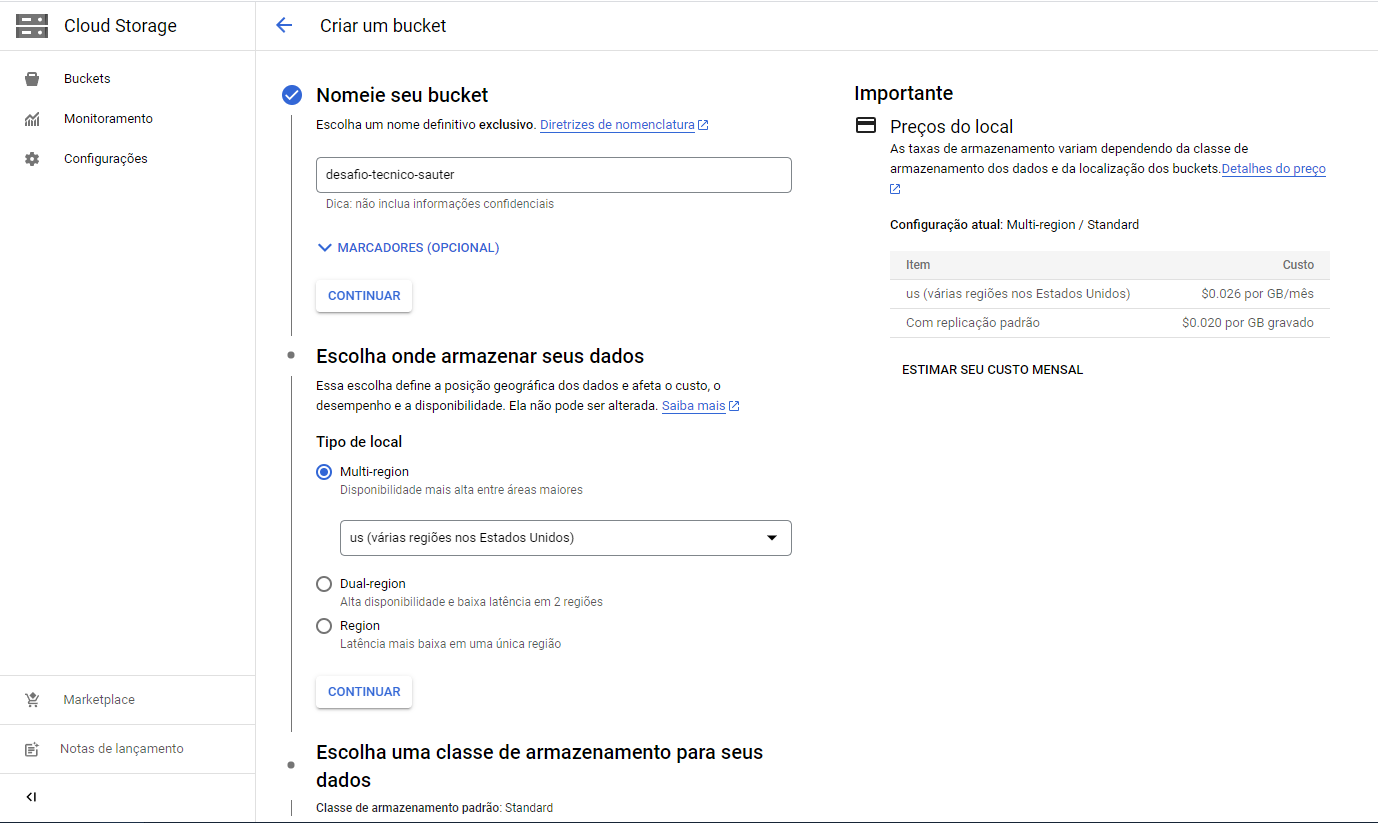

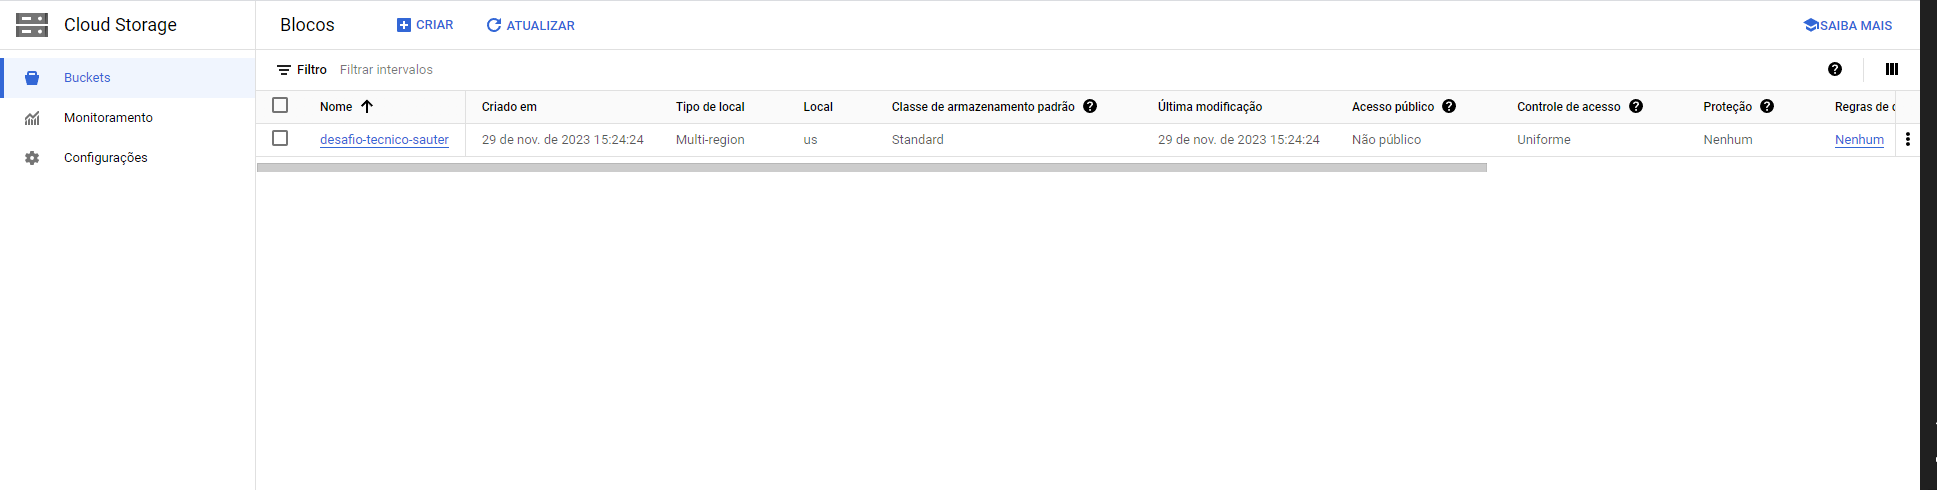

# Upload dos Dados Tratados para o Bucket

Após criar o bucket, realizei o upload do arquivo CSV contendo os dados tratados do Airbnb. Verifiquei o upload bem-sucedido no painel do Google Cloud Storage, onde o arquivo 'listings_dados_tratados.csv' foi listado. Isso me preparou para a próxima etapa: importar os dados para o BigQuery.


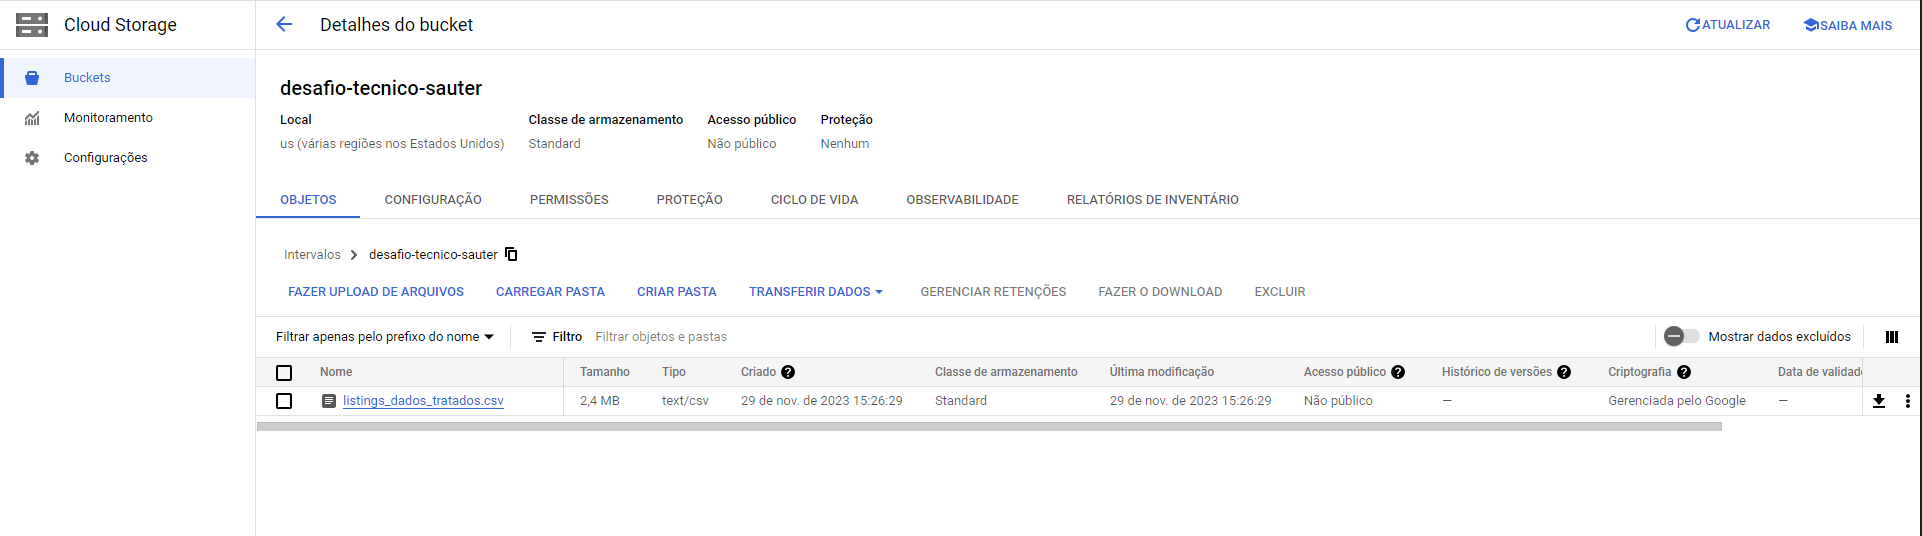

# Importando Dados para o BigQuery

Utilizando a interface do Google Cloud, importei os dados do CSV diretamente para uma tabela no BigQuery. Configurei o esquema para ser detectado automaticamente pelo BigQuery e não particionei os dados, pois queria manter a estrutura original para facilitar a análise e a modelagem.


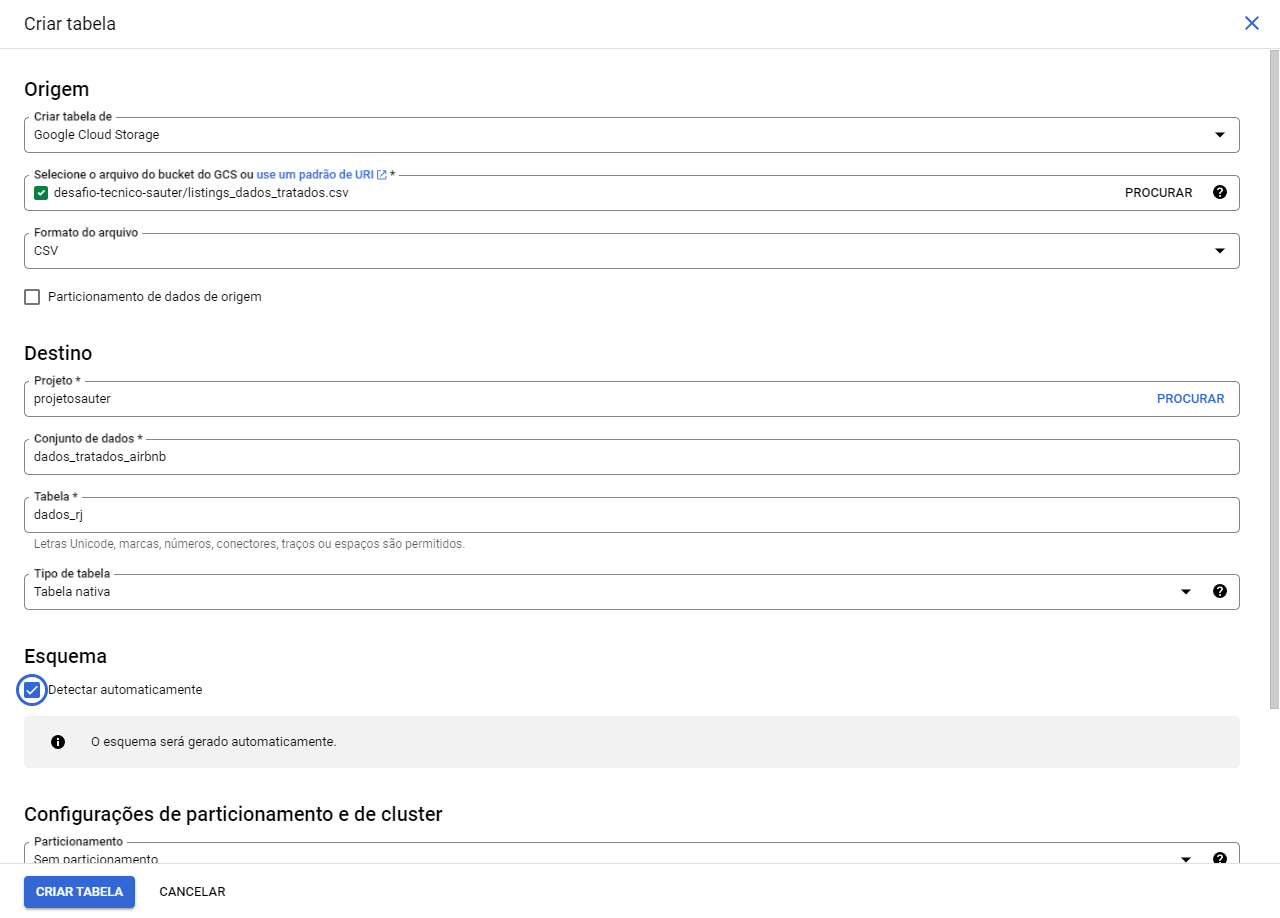

# Dados Importados com Sucesso para o BigQuery

Após a importação, confirmei que os dados foram carregados com sucesso para o BigQuery. Verifiquei a tabela 'dados_rj' para garantir que todas as colunas estavam presentes e com os tipos de dados corretos. Isso era essencial para assegurar a integridade dos dados para modelagem preditiva.


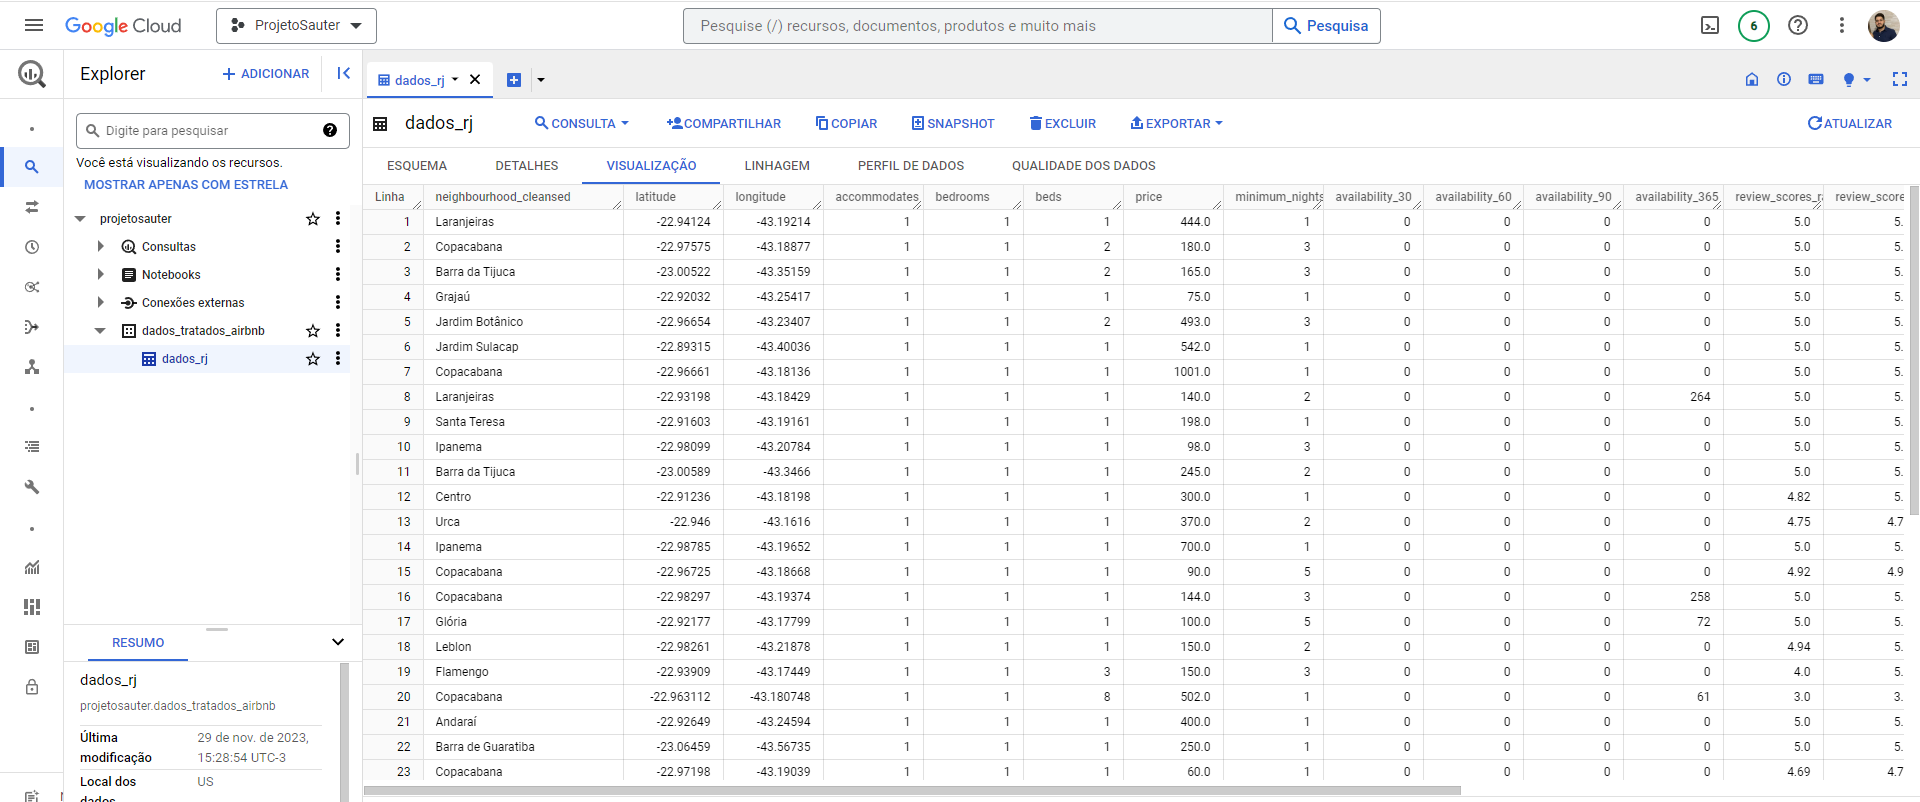

# Criação do Modelo de Regressão Linear no BigQuery ML

No BigQuery ML, criei um modelo de Regressão Linear chamado 'lienarmodel' utilizando os dados tratados. Especifiquei as variáveis preditoras e a variável alvo (price), e executei a criação do modelo. Isso permitiu que o BigQuery ML treinasse o modelo com base nas informações fornecidas.


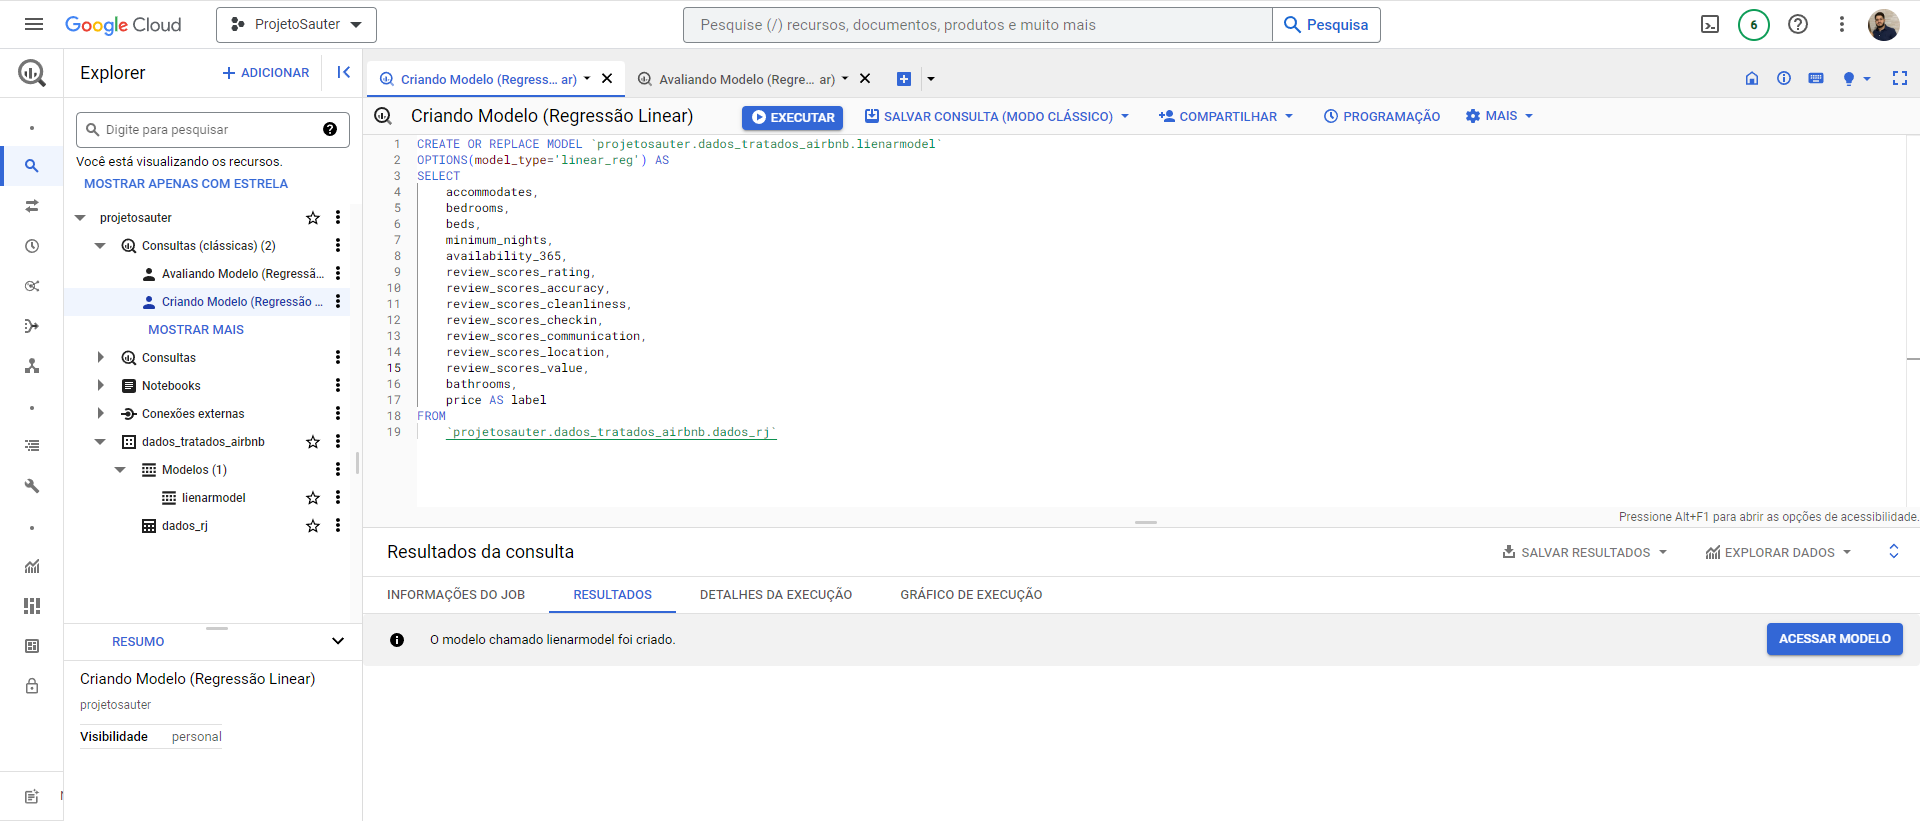

# Avaliação do Modelo de Regressão Linear

Depois de criar o modelo, avaliei seu desempenho usando a função `ML.EVALUATE` no BigQuery. Isso me deu várias métricas de desempenho, como o erro médio absoluto e o R², que usei para determinar quão bem o modelo estava prevendo os preços das listagens do Airbnb.


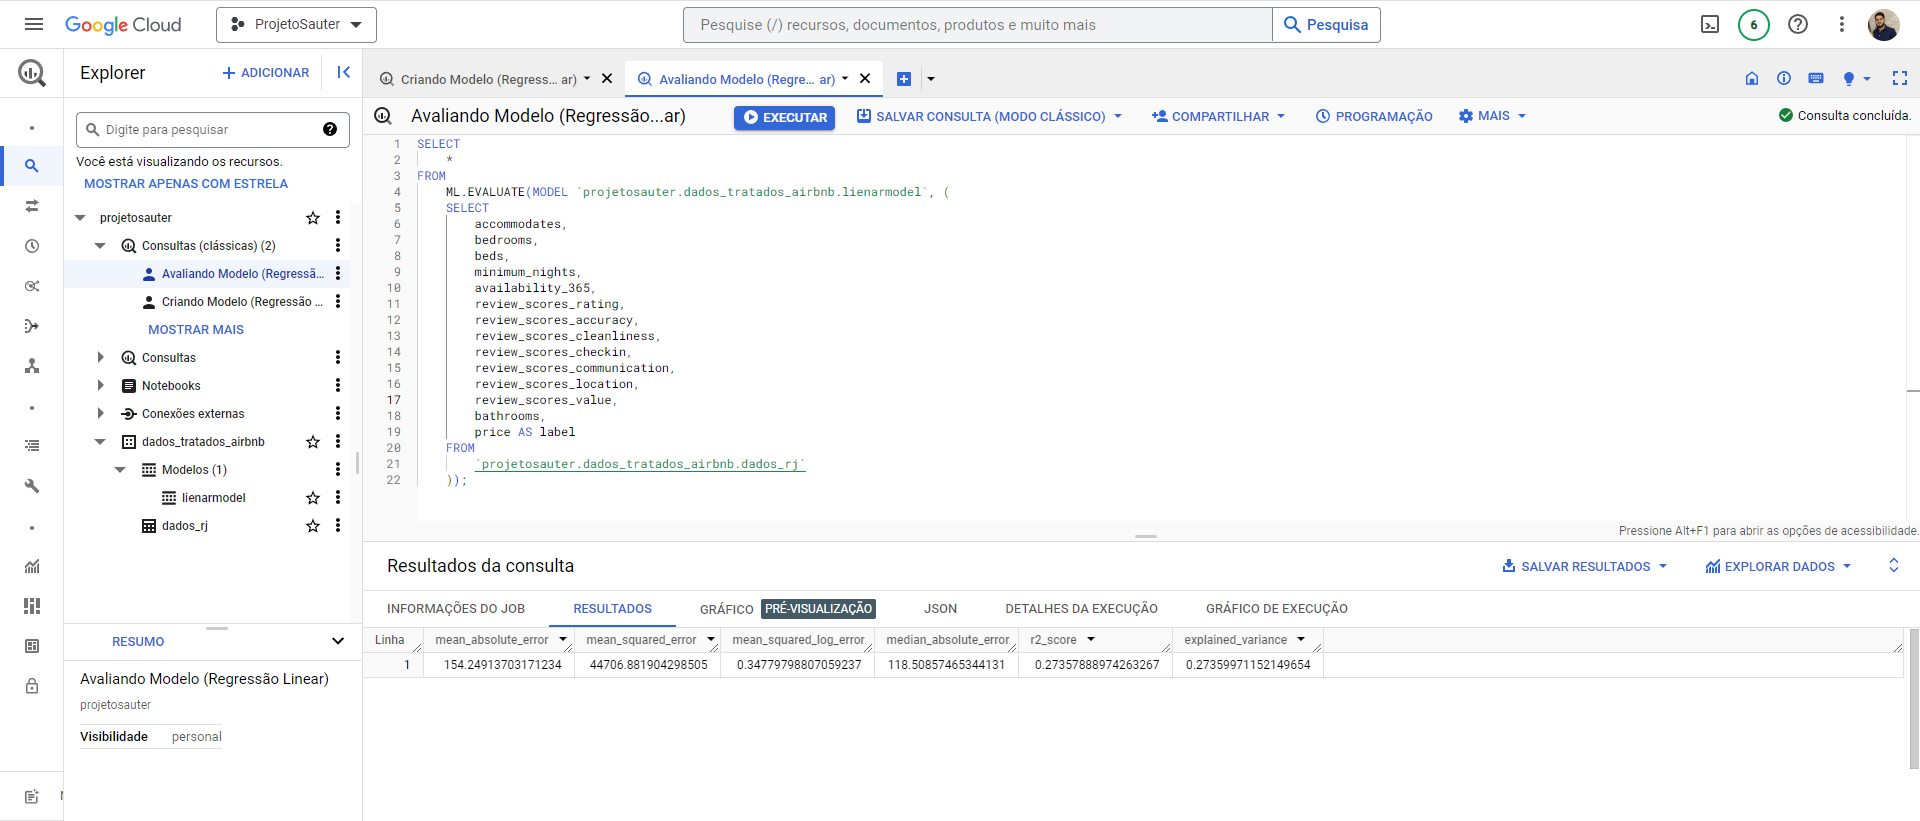

# Predição dos Preços com o Modelo de Regressão Linear

Finalmente, usei o modelo treinado para fazer previsões de preços em novos dados. Executei a função `ML.PREDICT` para aplicar o modelo 'lienarmodel' aos dados que eu queria prever. Os resultados me mostraram as previsões de preços ao lado das características da listagem, o que foi crucial para a fase de teste e validação do modelo.


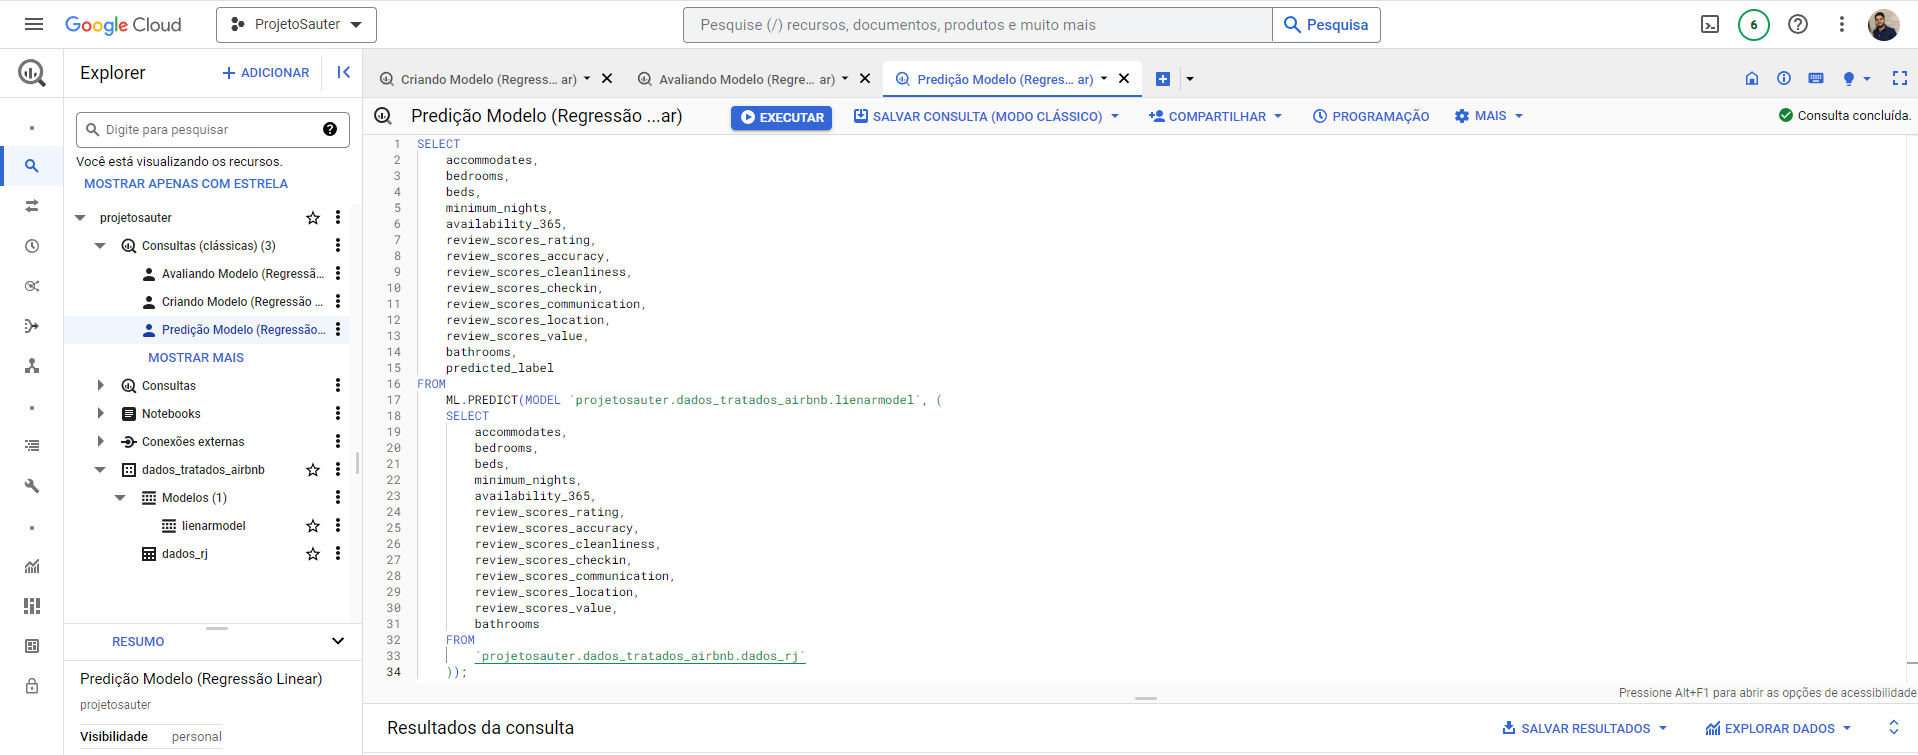

# Visualizando a predição dos preços na variável "predicted_label"

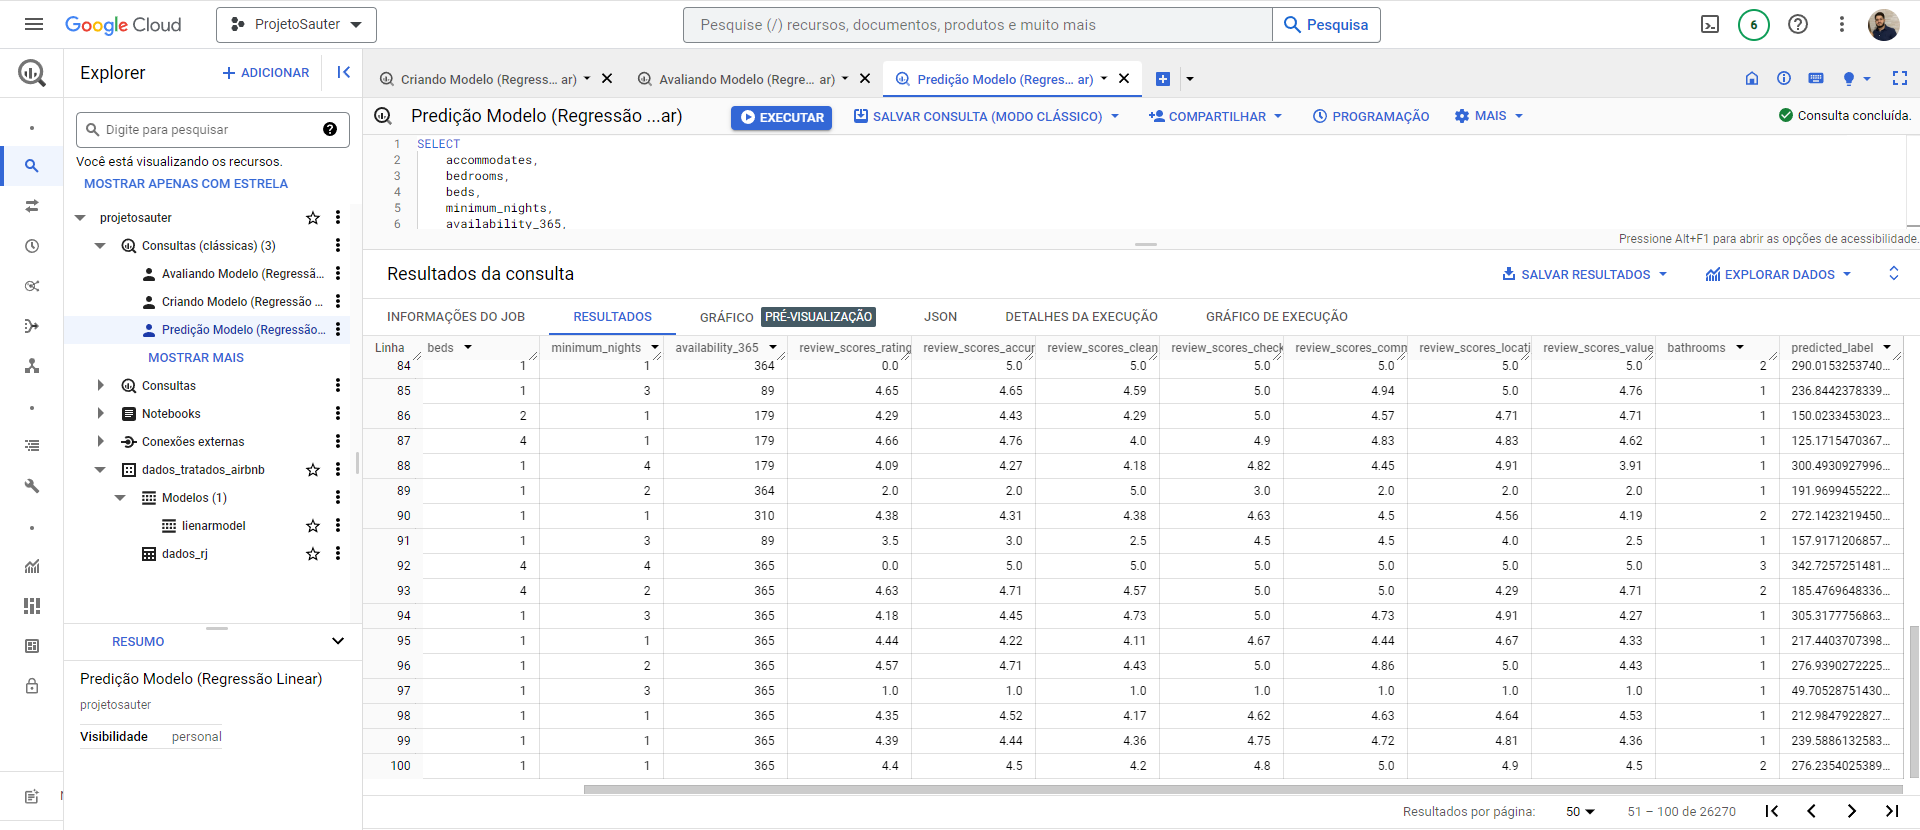

# Segunda Etapa : Desenvolvendo um modelo de Regressão Linear utilizando a biblioteca ScikitLearn.


# Introdução e Contexto

Aqui fiz a construção e avaliação de um modelo de Regressão Linear que visa prever os preços de listagens do Airbnb na cidade do Rio de Janeiro. A análise se baseia em um conjunto de dados que inclui diversas características . Utilizei a biblioteca Scikit-Learn do Python, uma ferramenta poderosa e flexível para aprendizado de máquina, para implementar e avaliar o modelo. O objetivo é entender quais fatores influenciam mais nos preços das listagens e quão bem podemos prever esses preços com base nessas características.


In [ ]:
import pandas as pd
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

# Carregamento e Primeira Inspeção dos Dados

Inicialmente, carreguei os dados a partir de um arquivo CSV, que é uma forma comum de armazenar dados tabulares. Este conjunto de dados foi obtido a partir de uma fonte pública e contém informações detalhadas sobre listagens do Airbnb na cidade do Rio de Janeiro. Nesta etapa, realizei uma primeira inspeção para entender a estrutura dos dados, incluindo o número de colunas, tipos de dados e uma visualização das primeiras linhas do conjunto de dados.


In [ ]:
df = pd.read_csv("listings_dados_tratados.csv")

# Preparação e Limpeza dos Dados

Nesta seção, preparei os dados para a modelagem. Isso inclui selecionar as colunas (características) que serão usadas para prever o preço das listagens. As características escolhidas são baseadas em nossa compreensão do que pode influenciar os preços no Airbnb, como o número de acomodações, qualidade das avaliações, e outros. Também dividimos os dados em dois conjuntos: um para treinar o modelo e outro para testá-lo. Esta divisão é crucial para avaliar o desempenho do modelo em dados que ele não viu durante o treinamento.


In [ ]:
# Selecionando as colunas para o modelo
features = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_365',
            'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'bathrooms']
target = 'price'

In [ ]:
# Preparando os dados para o modelo
X = df[features]
y = df[target]


In [ ]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construção e Treinamento do Modelo de Regressão Linear

Nesta etapa, fia a construção do modelo de Regressão Linear usando a biblioteca Scikit-Learn. A Regressão Linear é um dos modelos mais básicos e amplamente utilizados em análises preditivas. O modelo é treinado usando o conjunto de treino, que é uma parte do nosso conjunto de dados que o modelo utiliza para aprender as relações entre as características e os preços das listagens.


In [ ]:
# Instanciando e treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Avaliação do Modelo

Após o treinamento, avaliei o desempenho do modelo no conjunto de teste, que consiste em dados que o modelo não viu durante o treinamento. Utilizei várias métricas, como MSE, RMSE, MAE, MAPE, R² e Explained Variance, para obter uma visão abrangente da precisão e eficácia do modelo. Essas métricas ajudaramm a entender não apenas o quão próximas as previsões estão dos valores reais, mas também a consistência e confiabilidade dessas previsões.


In [ ]:
# Predições no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Avaliando a performance do modelo com diferentes métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R^2 Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')

Mean Squared Error: 46533.49989699924
Root Mean Squared Error: 215.71624856973392
Mean Absolute Error: 157.3587919553767
Mean Absolute Percentage Error: 0.6019933566334839
R^2 Score: 0.2714407402809592
Explained Variance Score: 0.2722942056486395


# QUESTÕES

# 1. Qualidade dos Dados:

Avalie a qualidade dos dados utilizados no projeto. Destaque possíveis
desafios encontrados e explique como abordou questões como valores ausentes e inconsistências.


**Resposta:** Ao analisar a qualidade dos dados do Airbnb, primeiramente explorei o conjunto de dados usando funções como head(), tail(), e sample() para ter uma visão inicial. Também utilizei describe() e info() para entender a distribuição e o tipo dos dados.
Identifiquei e tratei os valores nulos, que é um aspecto crucial da qualidade dos dados. Para colunas com um número significativo de valores nulos, avaliei a importância de cada uma delas no contexto da análise. Em alguns casos, optei pela remoção da coluna, enquanto em outros, realizei a imputação de dados com métodos apropriados, como média ou mediana, dependendo da natureza dos dados.
Enfrentei o desafio de lidar com a grande quantidade de colunas, algumas das quais não eram relevantes para a minha análise. Decidi remover essas colunas para simplificar o conjunto de dados, focando nas informações mais críticas.

# Aplicações Práticas:

Com um conjunto de dados tão diversificado, identifique outras possíveis
aplicações práticas.

**Resposta:** Com este conjunto de dados, identifiquei várias aplicações práticas. Uma delas é a análise de tendências no mercado de aluguel de curto prazo, incluindo padrões de preços e preferências de localização. Isso pode ser útil tanto para anfitriões quanto para viajantes.
Outra aplicação seria o desenvolvimento de modelos preditivos para prever preços de aluguel com base em características como localização, tamanho do imóvel, e comodidades oferecidas. Isso poderia ajudar os anfitriões a definir preços competitivos.
Além disso, análises mais detalhadas das avaliações poderiam revelar insights sobre a satisfação dos hóspedes, que seriam valiosos para os anfitriões melhorarem suas ofertas.

# 2. Automatização da Solução:

Descreva como você automatizaria a solução proposta. Quais ferramentas
ou técnicas seriam implementadas para garantir a consistência e
eficiência do pipeline?

**Resposta:** Para automatizar esta solução, desenvolveria um pipeline de dados usando ferramentas como Apache Airflow. Isso permitiria agendar e monitorar automaticamente as tarefas de coleta e tratamento dos dados.
Implementaria scripts Python para processar os dados e os configuraria para executar em intervalos regulares. Além disso, consideraria o uso de APIs para coletar dados atualizados automaticamente.
A integração com um sistema de banco de dados e a implementação de testes automatizados também fariam parte do pipeline para garantir a integridade e a qualidade dos dados.

# 3. Lidando com a Escalabilidade:

Aborde estratégias para lidar com a escalabilidade do volume de dados.
Como o pipeline poderia ser otimizado para acomodar grandes conjuntos
de dados sem comprometer a performance?



**Resposta:** Em termos de escalabilidade, utilizaria sistemas de processamento de dados distribuídos como Apache Spark para lidar com grandes volumes de dados. Isso garantiria que o pipeline possa escalar eficientemente à medida que o volume de dados aumenta.
Também empregaria técnicas de otimização de banco de dados, como indexação e particionamento, para melhorar o desempenho das consultas.
Para garantir a sustentabilidade do sistema, adotaria práticas de desenvolvimento modular e eficiente, permitindo a fácil manutenção e atualização do pipeline de dados.